今回の演習にはGPUが必要です。「ランタイム」メニューから「ランタイムのタイプを変更」、「ハードウェア アクセラレーター」を「T4 GPU」にします。

## この時間の目的
遺伝情報であるDNAはRNAを経由してタンパク質に翻訳され生命現象を担うというのは、さまざまな例外が見つかっている現代においてもセントラルドグマの根幹をなす。タンパク質は20アミノ酸が秩序だって配置された結果として独自の立体構造をとり、それぞれ異なる部位に局在し、そしてさまざまな機能を担っている。長い間、生命科学者はアミノ酸配列とそれらの生命科学現象の間の連関を捉えようと数多の研究を行ってきた。その一環として培われた膨大な構造データがタンパク質の立体構造解読に大きく前進したことは、Google DeepMind社のDemis Hassabis氏らによる「タンパク質構造の予測」、および米ワシントン大学のDavid Baker教授の「構造からのタンパク質設計」が2024年のノーベル賞になったこともあり記憶に新しい。タンパク質の「言語」を読み解けば構造・局在・機能といった多様なタンパク質の性質にアプローチできることを示している。このProjectでは、近年特に外国語の翻訳といった自然言語処理に革命をもたらしたTransformerやBERTモデルを使い、タンパク質の「言語」を紐解いていく。

## 生命科学研究に応用されつつある自然言語処理AI
Google翻訳やみらい翻訳、DeepLなど、昨今は非常に優秀でかつ無料で使える翻訳ツールがいろいろ開発されており、ちょっとした用途であれば十分実用に足る精度になっていることから愛好している読者も少なくないだろう。だが翻訳ツールはもともとこのような精度だったわけではない。

従来のGoogle翻訳は統計学的な手法に基づいていたのだが、2016年に深層学習を用いた方法に全面的に切り替わった。そして重要なのは2017年に登場した**Transformer**であり、これが翻訳業界を大きく変えた張本人である。自然言語に対する人工知能の構造としてはそれまで再帰型ニューラルネットワーク (Recurrent neural network, **RNN**) をベースにした手法が使われていたのだが、Transformerはそれとは根本的に異なる仕組みであった。

そんなTransformerにも弱点があった。モデルを大きくすればするほど高い性能が出るのだが、大きいモデルは計算負荷も膨大になり十分な資本を持つ大企業でないと使いこなせないのだ。そこで、例えばwikipediaなどにかかれている英語や日本語など人間が使う言葉 (**自然言語**という) を大きなモデルで訓練しておいて、それを一部の人だけではなく誰でも使えるように公開してくれるチームが現れ始めた。こういった**事前トレーニング** (pre-training) をしたモデルに自然言語を入力すると、それを数値のベクトルにしてくれるのだ。この数値ベクトルがあれば、大企業ほどは資本を持たない人たちであっても自分たちの目的にあったトレーニングが格段にしやすくなる。もともと膨大なデータで学習した事前学習済みモデルなので、自然言語に潜む有用な特徴をしっかりと捉えた数値ベクトルになっているからだ。

いくつもの事前学習済みモデルが発表されたのだが、BERT (Bidirectional Encoder Representations from Transformers) <sup>文献2)</sup>はその中でも特に有名なモデルである。BERTなどの膨大な自然言語データで事前学習したモデルを使って、さらに個々のタスクに特化した**fine-tuning**を行うことで自然言語に関するさまざまな課題が解決できるようになった。

この流れは当然のことながら生命科学研究にもすぐに入ってきた。英語の文章はアルファベット26文字で構成されているのに対し、DNAはアルファベット4文字、タンパクはアルファベット20文字で構成されている。ということは、自然言語で大成功したpretrainig・fine-tuningの枠組みが生命科学研究にも使えるだろう、というわけだ。自然言語で有名なBERTと全く同じ仕組みで、wikipediaの自然言語ではなくDNA配列を事前学習させたDNABERT<sup>文献3)</sup>や、タンパクのアミノ酸配列を学習させたProteinBERT<sup>文献4)</sup>などが登場した。

もちろん、BERTが唯一のモデルではない。特にタンパク質の配列についてさまざまな工夫を凝らして学習した事前学習済みモデルが今日まで多数登場しており、それらはまとめて**タンパク質言語モデル**と総称されている。

## アミノ酸配列のみからタンパクの局在を予測する: 事前学習済みモデルの利用

タンパク質言語モデルはさまざまな可能性を秘めており、その一例として本章では**アミノ酸配列のみから機械学習でそのタンパク質の局在を予測**していく。生命科学者はこれまで長い年月をかけて核移行シグナルや分泌シグナルなど種々の局在を規定するシグナルをアミノ酸配列中に見出してきたが、シグナル配列に関する事前知識をいっさい教えない状態でどの程度タンパク質の言語を読み解き局在を規定する因子を発見できるのだろうか？


本章の内容は2017年に発表されたDeepLoc論文<sup>文献5)</sup>をベースに大きく書き換えたものだ。原著論文ではLSTMベースのタンパク言語モデルを作成しタンパクの局在を予測している。データセットなどについて深く知りたい方は原著をあたってほしい。本章ではより新しく、またオープンになっている事前学習済みタンパク言語モデルを活用してGoogle Colabでも十分に動かすことができるシンプルだがより実践的なアプローチを紹介したい。これから作るモデル構成の概略はこのようになっている。手を動かしながら適宜確認してほしい。

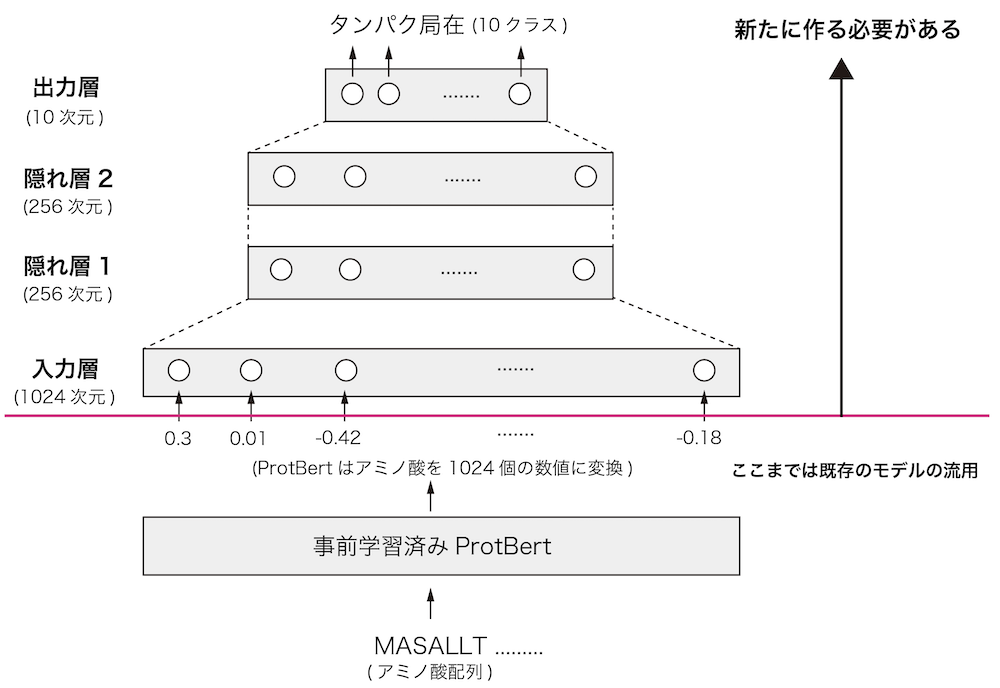

### 必要になるライブラリーの準備

上述のTransformerやBERTをはじめ、代表的な自然言語処理のアーキテクチャは種々の実装が公開されている。生命科学系の研究者はそういった先人の知恵を拝借させてもらった方がいいだろう。車輪の再発明をする必要はないのである。

PyTorchにもTransformerモジュールは提供されているのだが、ここではHugging Face社が提供している[Transformers](https://huggingface.co/docs/transformers/index)というライブラリーを紹介したい。Transformerを始めとした一連の手法を簡単に呼び出せるようになっているだけでなく、大規模データで事前学習したモデルを公開してくれているためとても簡単に利用することができる。

まずはいつものごとく代表的なライブラリーをインポートしよう。

In [1]:
%matplotlib inline

import os
import re
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import torch
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader

そしてtransformersというライブラリーをpipでインストールする。また、このコードにはもう1つ[sentencepiece](https://github.com/google/sentencepiece) というライブラリーも必要になるので合わせてインストールしよう。これはテキストをトークンにする際に使われるライブラリーである。

In [2]:
!pip install transformers sentencepiece

###  タンパク局在データのダウンロードと探索

データはDeepLoc論文<sup>文献3)</sup>で提供されているFASTAファイルを使うことにする。インストールはwgetコマンドで簡単にできる。次のコードは、インターネットからFASTAファイルを取得し、Google Colabの./dataにfastaファイルを保存する。

In [3]:
!wget https://services.healthtech.dtu.dk/services/DeepLoc-1.0/deeploc_data.fasta -P ./data -q

きちんとダウンロードできたのかlsコマンドで確認してみよう。

In [4]:
!ls ./data

deeploc_data.fasta


FASTAファイルの先頭6行を覗いてみる。

In [5]:
!head -n 6 ./data/deeploc_data.fasta

>Q9H400 Cell.membrane-M test
MGLPVSWAPPALWVLGCCALLLSLWALCTACRRPEDAVAPRKRARRQRARLQGSATAAEASLLRRTHLCSLSKSDTRLHELHRGPRSSRALRPASMDLLRPHWLEVSRDITGPQAAPSAFPHQELPRALPAAAATAGCAGLEATYSNVGLAALPGVSLAASPVVAEYARVQKRKGTHRSPQEPQQGKTEVTPAAQVDVLYSRVCKPKRRDPGPTTDPLDPKGQGAILALAGDLAYQTLPLRALDVDSGPLENVYESIRELGDPAGRSSTCGAGTPPASSCPSLGRGWRPLPASLP
>Q5I0E9 Cell.membrane-M
MEVLEEPAPGPGGADAAERRGLRRLLLSGFQEELRALLVLAGPAFLAQLMMFLISFISSVFCGHLGKLELDAVTLAIAVINVTGISVGHGLSSACDTLISQTYGSQNLKHVGVILQRGTLILLLCCFPCWALFINTEQILLLFRQDPDVSRLTQTYVMVFIPALPAAFLYTLQVKYLLNQGIVLPQVITGIAANLVNALANYLFLHQLHLGVMGSALANTISQFALAIFLFLYILWRKLHHATWGGWSWECLQDWASFLQLAIPSMLMLCIEWWAYEVGSFLSGILGMVELGAQSITYELAIIVYMIPAGFSVAANVRVGNALGAGNIDQAKKSSAISLIVTELFAVTFCVLLLGCKDLVGYIFTTDWDIVALVAQVVPIYAVSHLFEALACTCGGVLRGTGNQKVGAIVNAIGYYVIGLPIGISLMFVAKLGVIGLWSGIIICSVCQTSCFLVFIARLNWKLACQQAQVHANLKVNVALNSAVSQEPAHPVGPESHGEIMMTDLEKKDEIQLDQQMNQQQALPVHPKDSNKLSGKQLALRRGLLFLGVVLVLVGGILVRVYIRTE
>P63033 Cell.membrane-M
MMKTLSSGNCTLNVPAKNSYRMVVLGASRVGKSSIVSRFLNGRFEDQYTPTIEDFHRKVY

このように、2行1組構成になっていて、1行目にタンパクのIDや局在、そして2行目にアミノ酸が1文字表記で記載されているファイルであることが分かる。このファイルにはどのくらいの数のタンパクが記載されているのだろうか？ シンプルにはこのファイルの行数をwcコマンドのlオプションで調べてみるといい。

In [6]:
!wc -l ./data/deeploc_data.fasta

28008 ./data/deeploc_data.fasta


28008行からなるファイルであることが分かる。2行で1タンパクなので、このファイルには14004個のタンパクとその局在に関するデータがあるということだ。

このFASTA形式の読み込みには[Biopython](https://biopython.org/)というライブラリーが便利である。バイオインフォマティクスのさまざまな解析をアシストしてくれるライブラリーである。もちろん、Biopythonを使わなくてもFASTAファイルを読み取るカスタムスクリプトは比較的簡単にかけるのでBiopythonに馴染みがなければ無理に使わなずともよい。本章ではBiopythonを使ってFASTAファイルを読み込んでいく。

インストールはpipで簡単にできる。また、-qオプションでインストール時の出力を抑えているが、初めてBiopythonをインストール際には表示させた方がよい。

In [7]:
!pip install Bio -q
import Bio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.1/321.1 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.7 MB/s eta 0:00:00





FASTAファイルを読み込みデータフレームにする関数を自作する。

In [8]:
def read_fasta(file_path, columns) :
    from Bio.SeqIO.FastaIO import SimpleFastaParser
    with open(file_path) as fasta_file:
        records = []
        for title, sequence in SimpleFastaParser(fasta_file):
            record = []
            title_splits = title.split(None)
            record.append(title_splits[0])
            sequence = "".join(sequence)
            record.append(sequence)
            record.append(len(sequence))
            location_splits = title_splits[1].split("-")
            record.append(location_splits[0])
            record.append(location_splits[1])

            if(len(title_splits) > 2):
                record.append(0)
            else:
                record.append(1)

            records.append(record)
    return pd.DataFrame(records, columns = columns)

この自作関数を使ってfastaファイルの情報を読みこんでいく。

In [9]:
data = read_fasta('./data/deeploc_data.fasta', columns=['id', 'sequence', 'sequence_length', '_location', 'membrane', 'is_train'])
data.head()

,id,sequence,sequence_length,_location,membrane,is_train
0,Q9H400,MGLPVSWAPPALWVLGCCALLLSLWALCTACRRPEDAVAPRKRARR...,295,Cell.membrane,M,0
1,Q5I0E9,MEVLEEPAPGPGGADAAERRGLRRLLLSGFQEELRALLVLAGPAFL...,566,Cell.membrane,M,1
2,P63033,MMKTLSSGNCTLNVPAKNSYRMVVLGASRVGKSSIVSRFLNGRFED...,266,Cell.membrane,M,1
3,Q9NR71,MAKRTFSNLETFLIFLLVMMSAITVALLSLLFITSGTIENHKDLGG...,780,Cell.membrane,M,1
4,Q86XT9,MGNCQAGHNLHLCLAHHPPLVCATLILLLLGLSGLGLGSFLLTHRT...,240,Cell.membrane,M,1


FASTAファイルがPandasのデータフレームとして読み込めていることが分かる。本章で行うことは、sequence列に書かれているアミノ酸配列のみから、location列にあるタンパク局在を予測する機械学習モデルを構築することだ。

まずデータ数を確認しよう。

In [10]:
len (data)

14004

先ほどFASTAファイルの段階でwcコマンドで確認したのと同じく、14004データがあることが確認できた。アミノ酸配列はどれくらいの長さがあるのだろうか？

In [11]:
data['sequence_length'].describe()

,sequence_length
count,14004.00000
mean,522.44166
std,448.06671
min,40.00000
25%,249.00000
50%,421.00000
75%,649.00000
max,13100.00000


ほとんどのタンパクは数百アミノ酸だが、中には1万アミノ酸残基を超える長いものもあることが分かる。このような長いアミノ酸配列はそれだけリソースを消費するので、ここでは1000アミノ酸未満の長さに限定する。これはあくまでGoogle Colabで読者に気軽に体験していただくための処理だ。

In [12]:
data = data [data ['sequence_length'] < 1000]
len (data)

12614

もともと14004あったので、9割ほどは残っていることがわかった。分布も可視化しておこう。

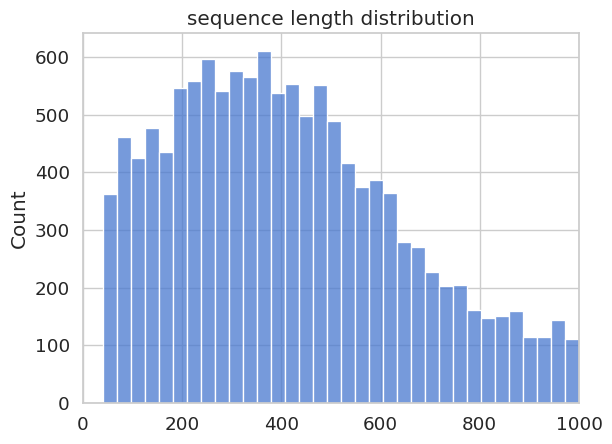

In [13]:
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
ax = sns.histplot(data['sequence_length'].values)
ax.set_xlim(0, 1000)
plt.title(f'sequence length distribution')
plt.grid(True)

このデータには欠損があるだろうか？

In [14]:
data.isnull().values.any()

np.False_

幸いにしてデータには欠損値がないようなので、このまま解析を続けていく。このデータに含まれる局在は全部で何種類あるのだろうか？

In [15]:
unique_classes = data._location.unique()
print('Number of classes: ', len(unique_classes))
print (unique_classes)

Number of classes:  10
['Cell.membrane' 'Cytoplasm' 'Endoplasmic.reticulum' 'Golgi.apparatus'
 'Lysosome/Vacuole' 'Mitochondrion' 'Nucleus' 'Peroxisome' 'Plastid'
 'Extracellular']


どうやら10種類の局在が区別されている。つまり今からトライするのは、アミノ酸配列のみからこれら10種類の局在をどれくらい分類できるのかということである。

PyTorchで扱う上では文字列ではなくカテゴリーの数値として変換しておく。例えばCell.membraneを0, Cytoplasmを1, Endoplasmic.reticulumを2という具合である。

In [16]:
categories = data._location.astype('category').cat
data['location'] = categories.codes
class_names = categories.categories
num_classes = len(class_names)
print(class_names)

Index(['Cell.membrane', 'Cytoplasm', 'Endoplasmic.reticulum', 'Extracellular',
       'Golgi.apparatus', 'Lysosome/Vacuole', 'Mitochondrion', 'Nucleus',
       'Peroxisome', 'Plastid'],
      dtype='object')


In [17]:
data['location']

,location
0,0
1,0
2,0
3,0
4,0
...,...
13999,3
14000,3
14001,3
14002,3


符号化ができていることが分かる。

一応今回の目的変数となるタンパク質の局在のデータの分布も可視化しておく。_locationは符号化する前のラベル

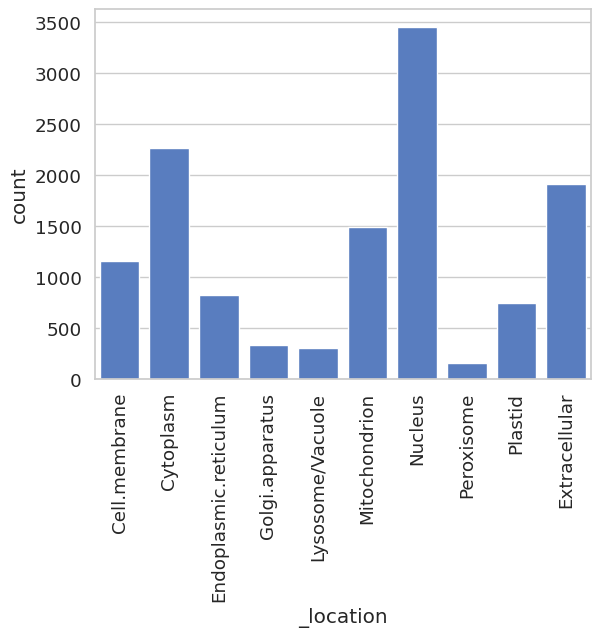

In [18]:
sns.countplot(x="_location", data=data)
plt.xticks(rotation=90)
plt.show()

それではトレーニングとテストデータに分けよう。トレーニングデータは次の10169データ。

In [19]:
df_train = data[data.is_train == 1]
df_train = df_train.drop(['is_train'], axis = 1)
print (df_train.shape[0])
df_train.head()

10169


,id,sequence,sequence_length,_location,membrane,location
1,Q5I0E9,MEVLEEPAPGPGGADAAERRGLRRLLLSGFQEELRALLVLAGPAFL...,566,Cell.membrane,M,0
2,P63033,MMKTLSSGNCTLNVPAKNSYRMVVLGASRVGKSSIVSRFLNGRFED...,266,Cell.membrane,M,0
3,Q9NR71,MAKRTFSNLETFLIFLLVMMSAITVALLSLLFITSGTIENHKDLGG...,780,Cell.membrane,M,0
4,Q86XT9,MGNCQAGHNLHLCLAHHPPLVCATLILLLLGLSGLGLGSFLLTHRT...,240,Cell.membrane,M,0
5,A2CI98,MDPSKQGTLNRVENSVYRTAFKLRSVQTLCQLDLMDSFLIQQVLWR...,653,Cell.membrane,M,0


テストデータは次の2445データである。

In [20]:
df_test = data[data.is_train == 0]
df_test = df_test.drop(['is_train'], axis = 1)
print (df_test.shape[0])
df_test.head()

2445


,id,sequence,sequence_length,_location,membrane,location
0,Q9H400,MGLPVSWAPPALWVLGCCALLLSLWALCTACRRPEDAVAPRKRARR...,295,Cell.membrane,M,0
9,P83456,AGFPEQEPEPKFWNDWAQKTLDKALSLQTLNKNKAQNLILFLGDGM...,477,Cell.membrane,M,0
20,Q03445,MHSRLKFLAYLHFICASSIFWPEFSSAQQQQQTVSLTEKIPLGAIF...,991,Cell.membrane,M,0
23,P35525,MAAATAAAATVAGEGMEPRALQYEQTLMYGRYTQELGAFAKEEAAR...,907,Cell.membrane,M,0
29,P35523,MEQSRSQQRGGEQSWWGSDPQYQYMPFEHCTSYGLPSENGGLQHRL...,988,Cell.membrane,M,0


### 事前訓練済みタンパク言語モデルのダウンロード

それではタンパク言語モデルをダウンロードする。これまでさまざまなタンパク事前トレーニング済みモデルが提供されているが、ここではProtBert<sup>文献6)</sup>を使用しよう。モデルは2.3GBになる。

In [21]:
from transformers import T5EncoderModel, T5Tokenizer

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Using {}'.format(device))

Using cuda:0


必要になる自作関数を定義しておく。get_T5_model ()関数は事前学習済みモデルをHugging Face経由でダウンロードし、モデルとトークナイザーを返す。

In [22]:
def get_T5_model():
    model = T5EncoderModel.from_pretrained('Rostlab/prot_t5_xl_half_uniref50-enc')
    model = model.to(device)
    model = model.eval()
    tokenizer = T5Tokenizer.from_pretrained('Rostlab/prot_t5_xl_half_uniref50-enc', do_lower_case=False)

    return model, tokenizer

Hugging Face経由でProtBertモデルとトークナイザーをダウンロードする。Google Colabでは1分程度かかる。

In [23]:
model, tokenizer = get_T5_model()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/656 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.42G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.42G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


### アミノ酸配列を事前訓練済みモデルで数値化

トレーニングデータおよびテストデータのアミノ酸配列を抽出する。トレーニングデータは

In [24]:
train_sequences = { i: seq for i, seq in enumerate(df_train['sequence'])  }
train_sequences

{0: 'MEVLEEPAPGPGGADAAERRGLRRLLLSGFQEELRALLVLAGPAFLAQLMMFLISFISSVFCGHLGKLELDAVTLAIAVINVTGISVGHGLSSACDTLISQTYGSQNLKHVGVILQRGTLILLLCCFPCWALFINTEQILLLFRQDPDVSRLTQTYVMVFIPALPAAFLYTLQVKYLLNQGIVLPQVITGIAANLVNALANYLFLHQLHLGVMGSALANTISQFALAIFLFLYILWRKLHHATWGGWSWECLQDWASFLQLAIPSMLMLCIEWWAYEVGSFLSGILGMVELGAQSITYELAIIVYMIPAGFSVAANVRVGNALGAGNIDQAKKSSAISLIVTELFAVTFCVLLLGCKDLVGYIFTTDWDIVALVAQVVPIYAVSHLFEALACTCGGVLRGTGNQKVGAIVNAIGYYVIGLPIGISLMFVAKLGVIGLWSGIIICSVCQTSCFLVFIARLNWKLACQQAQVHANLKVNVALNSAVSQEPAHPVGPESHGEIMMTDLEKKDEIQLDQQMNQQQALPVHPKDSNKLSGKQLALRRGLLFLGVVLVLVGGILVRVYIRTE',
 1: 'MMKTLSSGNCTLNVPAKNSYRMVVLGASRVGKSSIVSRFLNGRFEDQYTPTIEDFHRKVYNIHGDMYQLDILDTSGNHPFPAMRRLSILTGDVFILVFSLDSRESFDEVKRLQKQILEVKSCLKNKTKEAAELPMVICGNKNDHSELCRQVPAMEAELLVSGDENCAYFEVSAKKNTNVNEMFYVLFSMAKLPHEMSPALHHKISVQYGDAFHPRPFCMRRTKVAGAYGMVSPFARRPSVNSDLKYIKAKVLREGQARERDKCSIQ',
 2: 'MAKRTFSNLETFLIFLLVMMSAITVALLSLLFITSGTIENHKDLGGHFFSTTQSPPATQGSTAAQRSTATQHSTATQSSTATQTSPVPLTPESPLFQNFSGYHIGVGRADCTGQVADINLMGYGKSGQNAQGILTRLYSRAFIMAEP

In [25]:
len (train_sequences)

10169

データ数と同じ10169種類の配列が得られている。テストデータは次の2445配列である。

In [26]:
test_sequences = { i: seq.replace(' ', '') for i, seq in enumerate(df_test['sequence']) }
len (test_sequences)

2445

次に、モデルとトークナイザー、アミノ酸配列を受け取り、アミノ酸配列をそのモデル&トークナイザーで処理した埋め込み表現を返すような自作関数を作る。

In [27]:
def get_embeddings( model, tokenizer, seqs, max_residues=4000, max_seq_len=1000, max_batch=100 ):
    results = {'protein_embs' : dict()}
    seq_dict   = sorted( seqs.items(), key=lambda kv: len( seqs[kv[0]] ), reverse=True )
    start = time.time()
    batch = list()
    for seq_idx, (pdb_id, seq) in enumerate(seq_dict,1):
        seq = seq
        seq_len = len(seq)
        seq = ' '.join(list(seq))
        batch.append((pdb_id,seq,seq_len))

        n_res_batch = sum([ s_len for  _, _, s_len in batch ]) + seq_len
        if len(batch) >= max_batch or n_res_batch>=max_residues or seq_idx==len(seq_dict) or seq_len>max_seq_len:
            pdb_ids, seqs, seq_lens = zip(*batch)
            batch = list()

            token_encoding = tokenizer.batch_encode_plus(seqs, add_special_tokens=True, padding='longest')
            input_ids      = torch.tensor(token_encoding['input_ids']).to(device)
            attention_mask = torch.tensor(token_encoding['attention_mask']).to(device)

            try:
                with torch.no_grad():
                    embedding_repr = model(input_ids, attention_mask=attention_mask)
            except RuntimeError:
                print('RuntimeError during embedding for {} (L={})'.format(pdb_id, seq_len))
                continue

            for batch_idx, identifier in enumerate(pdb_ids):
                s_len = seq_lens[batch_idx]
                emb = embedding_repr.last_hidden_state[batch_idx,:s_len]
                protein_emb = emb.mean(dim=0)
                results["protein_embs"][identifier] = protein_emb.detach().cpu().numpy().squeeze()


    passed_time=time.time()-start
    avg_time = passed_time/len(results['protein_embs'])
    print('\n##### EMBEDDING COMPLETED ######')
    print('Total number of per-protein embeddings: {}'.format(len(results["protein_embs"])))
    print("Time for generating embeddings: {:.1f}[m] ({:.3f}[s/protein])".format(
        passed_time/60, avg_time ))
    print('\n############# END #############')
    return results

トレーニングデータである10169アミノ酸配列を数値にする。Google Colab (GPU T4) でおよそ1時間かかる。  
今回は、あらかじめ数値化されたデータを読み込んでtraingデータとする。

In [ ]:
# 今回は実行しない。
# train_embeddings = get_embeddings(model, tokenizer, train_sequences)

get_embeddings関数の実行結果は以下のようになる。おおよそ1秒間に3つのタンパク質を数値変換できている。
```
##### EMBEDDING COMPLETED ######
Total number of per-protein embeddings: 10169
Time for generating embeddings: 60.7[m] (0.358[s/protein])

############# END #############
```



埋め込み済みのデータを読み込む。

[こちらのリンク](https://drive.google.com/file/d/1-7gA9NhnEx8mD6sTxTuJ2q555kCCP7W8/view?usp=share_link)からzipファイルをダウンロードする。    
  
**Mac user**  
ダウンロードした時点で自動的にzipファイルが解凍されるので、中身の二つのファイル (train_embeddings.pklとtest_embedding.pkl) をgoogle colabにアップロードしてください。  


**Windows user**  
zipファイルとしてダウンロードしたファイルを解凍ののち、google colabにアップロードしてください。


**それ以外のOS user**  
zipファイルをunzipなどで解凍後、google colabにアップロードしてください。




In [ ]:
import pickle
with open("/content/train_embeddings.pkl", "rb") as f:
    train_embeddings = pickle.load(f)

最初の1つを見てみると、1024個の要素からなる1次元配列になっていることが分かる。

In [ ]:
print (train_embeddings ['protein_embs'][0])
print (train_embeddings ['protein_embs'][0].shape)

同様にしてテストデータに含まれるアミノ酸配列も埋め込んでおこう。Google Colabで10分くらいかかる。  
ただし、testデータに関しても出来合いのものを使用する。

In [ ]:
# 今回は実行しない。
# test_embeddings = get_embeddings( model, tokenizer, test_sequences)

get_embeddings関数の実行結果は以下のとおり。

```
##### EMBEDDING COMPLETED ######
Total number of per-protein embeddings: 2445
Time for generating embeddings: 14.8[m] (0.362[s/protein])

############# END #############
```



埋め込み済みのtestデータを読み込む

In [ ]:
with open("/content/test_embeddings.pkl", "rb") as f:
    test_embeddings = pickle.load(f)

## アミノ酸配列のみからタンパクの局在を予測する: タンパク局在データによるfine-tuning

ここまでやったことは、アミノ酸配列を事前学習済みモデルを使って数値に変換したことだ。数値に変換したあとは、いつもの道と変わらない。例えば機械学習の入門書に必ずといっていいほど掲載されているMNISTという手書き数字の10分類問題では、最もシンプルには28x28ピクセルの画像を784次元ベクトルにして、いくつかの全結合層を通して最終的に10個のノードに集約し、活性化関数としてソフトマックス関数を使って確率に変換して誤差関数であるクロスエントロピーを指標にしてAdamなどの最適化手法でパラメーターを更新していくのであった。

タンパク言語モデルで得られた数値ベクトルは、MNISTと全く同じように扱っていくことができる。ここではタンパクの1024次元ベクトルを2回の全結合層を通して10個のノードに集約し、活性関数にソフトマックス関数、誤差関数にクロスエントロピー、最適化手法にAdamを使ったシンプルなニューラルネットワークでどこまでタンパクの局在に迫れるのか見ていこう。

タンパク言語の事前学習済みモデルで数値に変換したあとに、局在に関するデータでfine-tuningしていることになる。


### ニューラルネットワークの設定

まずデータセット・データローダーの準備からだ。PyTorchのTensorDataset、DataLoaderを使っていく。

In [ ]:
#目的変数 (局在情報) と入力変数 (タンパク質の1024次元の数値ベクトル) をまとめてdatasetに変換
train_embedding_matrices = torch.zeros (len (df_train), 1024)

for i, v in enumerate(train_embeddings ['protein_embs'].values()):
   train_embedding_matrices[i] = torch.from_numpy(v.astype(np.float32))
target = torch.tensor(df_train['location'].values, dtype=torch.int64)

train_dataset = torch.utils.data.TensorDataset(train_embedding_matrices, target)

これでトレーニングデータをデータセットにまとめることができた。次にデータローダーにする。

In [ ]:
#バッチサイズ
batch_size = 64

# shuffle はデフォルトで False のため、学習データのみ True に指定
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size, shuffle=True)

上記コードではバッチサイズは64にしているが、これから作るモデルは非常にシンプルで計算負荷が軽いので、バッチサイズはやや大きめに設定しても構わないし、パフォーマンスはそれほど変化しない。

次にニューラルネットワークの定義だ。入力は1024次元、そして256次元の隠れ層2つを通して出力層として分類する必要があるクラス数と同じ10次元のものを用意する。隠れ層の活性化関数にはReLU, 出力層にはsoftmax関数を設定する。

In [ ]:
# ニューラルネットワークの定義

class Simple_Net(nn.Module):

    # 使用するオブジェクトを定義
    def __init__(self):
        super(Simple_Net, self).__init__()
        self.fc1 = nn.Linear(1024, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    # 順伝播。活性化関数を明示して表記している。
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

# インスタンス化
simple_net = Simple_Net()

損失関数には多分類問題でよく使われているクロスエントロピー、最適化にはAdam (学習率0.001) を使うことにする。

In [ ]:
# 損失関数・最適化の設定

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(simple_net.parameters(), lr=0.001)

### タンパク局在の学習

それでは作成したニューラルネットワークを使ってタンパク局在を学習していく。ここでは本質に専念していただくために、あえてearly stoppingなどの設定はせずにエポック数を100として学習する。また、トレーニングデータでの損失をエポックごとに表示する。トレーニングにかかる時間は2分ほどだ。

In [ ]:
# 100エポック学習

loss_history = []

for epoch in range(100):
    total_loss = 0
    for x, y in train_loader:

        # 学習ステップ
        optimizer.zero_grad()
        outputs = simple_net (x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    loss_history.append(total_loss)
    print(epoch + 1, total_loss)

トレーニングデータに対する損失の変化をプロットしよう。

In [ ]:
plt.ylabel("Total Loss")
plt.xlabel("Epoch")
plt.plot(loss_history)

全体的にはエポック数とともに損失が下がってきていることが分かる。

### 学習済みモデルのテストデータに対する性能評価
それでは100エポック学習させたモデルを使って、まだ見ていないテストデータに対するパフォーマンスを調べてみる。およそ1万タンパクのデータをシンプルなニューラルネットワークで2分ほど学習させただけだが、どの程度局在予測ができるのだろうか？

テストデータに対するdatasetとdataloaderをトレーニングデータと同様に作成する。

In [ ]:
#目的変数 (局在情報) と入力変数 (タンパク質の1024次元の数値ベクトル) をまとめてdatasetに変換
test_embedding_matrices = torch.zeros (len (df_test), 1024)

for i, v in enumerate(test_embeddings ['protein_embs'].values()):
   test_embedding_matrices[i] = torch.from_numpy(v.astype(np.float32))
target = torch.tensor(df_test['location'].values, dtype=torch.int64)


#目的変数と入力変数をまとめてdatasetに変換
test_dataset = torch.utils.data.TensorDataset(test_embedding_matrices, target)

In [ ]:
#バッチサイズ
batch_size = 64

# shuffle はデフォルトで False
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size)

それでは訓練したデータにテストデータにあるアミノ酸配列 (をタンパク言語モデルで数値にしたもの) を提示して局在を予測させ、正解データとの一致率を算出してみよう。

In [ ]:
## テストデータにおける正解率を検証

correct = 0
total = 0

with torch.no_grad():
  for x, y in test_loader:
      outputs = simple_net (x)
      _, predicted = torch.max(outputs.data, 1)
      total += y.size(0)
      correct += (predicted == y).sum().item()
print('正解率', int(correct)/total*100)

とてもシンプルな学習だったが、驚くべきことにテストデータでの正解率は80%近くもある。アミノ酸配列に潜むタンパク局在を制御する法則を理解しかけていると言えよう。

最後に、混同行列 (confusion matrix) も表示してみよう。そのためには、まずテストデータでの正解ラベルとモデルの予測を取得する必要がある。

In [ ]:
true_list = []
pred_list = []

with torch.no_grad():
  for x, y in test_loader:
    outputs = simple_net (x)
    _, predicted = torch.max(outputs.data, 1)
    pred_list += predicted.detach().numpy().tolist()
    true_list += y.detach().numpy().tolist()

混同行列はscikit-learnで実装されているので、ここではそれを使っていく。

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_list, pred_list)
print(cm)

このままだと見にくい。Seabornのヒートマップで可視化してみる。

In [ ]:
sns.heatmap(cm)

モデル構築の際に局在を数値に変換したが、そのまま表示しても見にくいのでもとの文字列に戻しておこう。合わせて、いくつか図のカスタマイズを行って見やすくしたヒートマップを表示してみる。

In [ ]:
cm = pd.DataFrame(data=cm, index=class_names.tolist(),
                           columns=class_names.tolist())

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cm, square=True, cbar=True, annot=True, cmap='Blues', fmt='d')
plt.yticks(rotation=0)
plt.xlabel("Prediction", fontsize=13, rotation=0)
plt.ylabel("Ground Truth", fontsize=13)
ax.set_ylim(len(cm), 0)
print ('アミノ酸配列のみからタンパク局在予測結果')

これをみると、少なくともCytoplasm (細胞質局在), Extracellular (分泌), Mitochondrion (ミトコンドリア)、Nucleus (核局在) は概ね正しく分類することができている。それに対して、Cell.membrane (膜タンパク) をはじめとして他の部位のタンパクについてはまだまだ精度不足のようだ。

ただ、カテゴリーをよく見てみると例えばリソソーム局在とペルオキシソーム局在、あるいは小胞体局在とゴルジ局在など、生命科学者であってもさまざまな実験データを統合しなければ区別が難しい組み合わせが多数含まれている。モデルが利用できる手がかりはアミノ酸配列のみであることを考えると、細胞質局在・核局在・ミトコンドリア局在・分泌タンパクの区別がかなり正確にできるのは特筆すべきと言えるだろう。


## おわりに
本稿ではタンパク質言語を紐解くBERTモデルについて、Google Colabでもストレスなく学べるようシンプルなニューラルネットワークによるfine-tuningを中心に紹介した。 あくまで概要を分かりやすく届けるために、あえてさまざまなハイパーパラメーターの最適化を割愛しているが、これによりさらに精度は上昇するだろう。ここは読者への練習問題として残しておきたい。

タンパク言語モデルはさまざまな工夫を凝らしたモデルが存在するし、またタンパクに関するデータも何も局在である必要はない。さらに、モデルが得られたらどの位置のアミノ酸を何に置換すればより望ましい機能をもつタンパクが得られるのかといった人工タンパクの設計にも使用できる。例えばAlleyらはLSTMベースのタンパク言語モデルを作成し、タンパク質の蛍光度に関するデータで学習させ、より望ましい蛍光タンパクを見出している<sup>文献7)</sup>。タンパク言語モデルはまだ発展途上にあるが、今後はさまざまなタンパク科学研究の必須ツールの1つになっていくだろう。

## 引用文献
1. Vaswani A, et al: arXiv, 2017 doi:10.48550/arXiv.1706.03762
2. Devlin J, et al: arXiv, 2018 doi: 10.48550/arXiv.1810.04805
3. Ji Y, et al: Bioinformatics 37: 2112–2120, 2021 doi: 10.1093/bioinformatics/btab083
4. Brandes N, et al: Bioinformatics 38: 2102–2110, 2022 doi: 10.1093/bioinformatics/btac020
5. Almagro Armenteros JJ, et al: Bioinformatics 33: 3387-3395, 2017 doi: 10.1093/bioinformatics/btx431

6. Elnaggar A, et al: IEEE Trans. Pattern Anal. Mach. Intell., 2021 doi: 10.1109/TPAMI.2021.3095381

7. Alley EC, et al: Nat. Methods 16: 1315-1322, 2019 doi: 10.1038/s41592-019-0598-1